# An instruction for those who are interested in how to download data from Vkontakte

The instruction consists of two steps. At first, you need to register on the website VK for developers and get an access token. In the second step, you already can download data, which can be done in two ways:

1. Using Python
2. Using the website VK for developers (unlike the first one, there will be difficulties with automating the process).

## 1. Registration

1. Go to the VK website https://dev.vk.com/, click on the button *Create Application*. Here you need to set a title and choose *Standalone app* platform. And you're done with registration!
2. Now you need to get an access token which you will use while making requests.To get an access token, you will need to make two requests, in fact, follow two links, personalizing them a bit:

- The 1st link: https://oauth.vk.com/authorize?client_id=APP_ID&display=page&redirect_uri=https://oauth.vk.com/blank.html&scope=friends&response_type=code&v=5.131
  
  Copy this link, changing only the **APP_ID** to your real ID, which can be found in the settings of your application on the VK for developers website. Then follow the modified link. You will be redirected to a new link that will contain the code (you need it, copy it). It will look something like this 'https://oauth.vk.com/blank.html#code=*****'. 
  
  
- The 2nd link: https://oauth.vk.com/access_token?client_id=APP_ID&client_secret=SECURE_KEY&redirect_uri=https://oauth.vk.com/blank.html&code=CODE
  
  In this link, you need to change three spots - **APP_ID** (located in the settings), **SECURE_KEY** (also in the settings) and **CODE** (which you received in the previous step). Follow the modified link and you will get something like this '{"access_token":"*********","expires_in":*********,"user_id":*****}'. Basically, all you need is an access token, save it somewhere.
  
The first step is completed!

**!** *But you should be aware that the access token is not given to you forever, it will expire soon (as they say, in a day or so). So when it stops working, you will need to do the last two steps above again: just follow the two links, your application on the VK will still be there.*
  
## 2.1 Getting posts from the VK walls using python

The library requests is the only one which is needed. I will show the procedure on the example of the group of the Novosibirsk region governor, Andrey Travnikov.

On the VK for developers website there is a section called API, here descriptions of all the functions are collected. We need *wall.get*, it helps to return a list of posts from a user's or community's wall - https://dev.vk.com/method/wall.get. It also contains a list of parameters for the request, here we, basically, repeat them.

In [3]:
import requests
import pandas as pd
import numpy as np

In [2]:
# save access token. (it's mine. already expired. won't work for you.)
access_token = 'vk1.a.yg9jG68L7YoKdwPuGZ2toKhr8gb5dcH1Va9Vx-q1r_3ooNl3BSbbWoaOEtHvFQ3uLMD3Te-Vw5OqFCM29FCetMOKFMTlrrrw5vA0SJzrc3eC3PrGGQBysLJtFvR2isAXmjyoLpW-5NHwDe729D5lGdxG8wUAW3CJdxLMEIJBHiUeEM30h8CFsmcn6WtyW29c'

- In the first line, you need to insert a link to the method, copy it from the VK website, changing only the **dev.vk** to **api.vk**.
- In the parameters, we insert **owner_id** (add a '-' sign in front of it). The id is usually contained in the community link, but if it is not there, as in our case, then you can open any picture or video on the wall, the id will be in the link to them. 
- Then we specify the community domain, the number of posts we want to receive (VK sets a limit of no more than 100 posts per request), the access token and the VK version.

In [16]:
travnikov = requests.get("https://api.vk.com/method/wall.get", 
                         params={"owner_id": "-166427977",
                                 "domain": "https://vk.com/andreytravnikov_nso",
                                 "count": 2,
                                 "access_token": access_token,
                                 "v": 5.131})

In [17]:
# check for errors
travnikov.ok

True

In [18]:
# look at the data
travnikov.json()

{'response': {'count': 614,
  'items': [{'id': 10602,
    'from_id': -166427977,
    'owner_id': -166427977,
    'date': 1655608259,
    'marked_as_ads': 0,
    'is_favorite': False,
    'post_type': 'post',
    'text': 'Сегодня в нашей стране отмечают День медицинского работника.\n\nРаботники сферы здравоохранения – мужественные люди, которые держат в руках хрупкую человеческую жизнь. Для всех, кто посвятил себя медицине, избранное дело – забота о здоровье людей – стало жизненным призванием.\n\nМы искренне гордимся и восхищаемся профессиональными подвигами медработников Новосибирской области. Они всегда приходят на помощь, проявляя высочайший профессионализм и ответственность, сострадание и доброту. В сложный период борьбы с пандемией они вылечили, спасли тысячи жителей нашего региона.\n\nВ этот праздничный день выражаю искреннюю благодарность и глубокую признательность всем медицинским работникам за каждодневный, кропотливый труд и преданность избранной профессии! Крепкого здоровья, 

At the output, we get data in the form of a dictionary: 

- The *count* in the first line indicates the number of posts on the wall at the moment of the request, there are 614 of them. 
- Next, we see the id of each post and all the parameters that it has. 

We are only interested in the texts of posts, they can be derived from the dictionary separately.

In [19]:
# get only the 'text' parameter
for post in travnikov.json()['response']['items']:
    print(post['text'])

Сегодня в нашей стране отмечают День медицинского работника.

Работники сферы здравоохранения – мужественные люди, которые держат в руках хрупкую человеческую жизнь. Для всех, кто посвятил себя медицине, избранное дело – забота о здоровье людей – стало жизненным призванием.

Мы искренне гордимся и восхищаемся профессиональными подвигами медработников Новосибирской области. Они всегда приходят на помощь, проявляя высочайший профессионализм и ответственность, сострадание и доброту. В сложный период борьбы с пандемией они вылечили, спасли тысячи жителей нашего региона.

В этот праздничный день выражаю искреннюю благодарность и глубокую признательность всем медицинским работникам за каждодневный, кропотливый труд и преданность избранной профессии! Крепкого здоровья, оптимизма и благополучия!
В последний день работы Петербургского международного экономического форума пообщался с талантливыми школьниками, участвующими в федеральном проекте «Точка Юниор». Идеи новосибирских школьников интерес

### 2.1.1 Automatization

Above, we were able to get only the last 100 posts: to get another 100 earlier posts, we need to add an **offset** parameter to the request, with which we shift the sample back by these 100 posts. But doing this every time is too long, having over 600 posts, so we will automate the process by creating a loop.

- save n, it is our count, number of posts (614)
- create an empty dataframe
- set a range from 0 to 614 with step of 100
- put the same request, adding just the **offset** paramater which is connected to the loop (this is how python pumps out data 7 times (until it gets to 614), each time shifting by 100)
- after each of such downloads, the python will take the id and text of a hundred posts and put them to the dataframe, then attach this part to the general dataframe created earlier
- I asked python to print the id of every first post in each of the 7 '100-posts' requests to see if the requests are executing without error

In [8]:
n = travnikov.json()['response']['count']
combined = pd.DataFrame()

for i in range(0, n, 100):
    tr = requests.get("https://api.vk.com/method/wall.get", 
                     params={"owner_id": "-166427977",
                             "domain": "https://vk.com/andreytravnikov_nso",
                             "count": 100,
                             "offset": i,
                             "access_token": access_token,
                             "v": 5.131})
    
    df = pd.DataFrame(tr.json()['response']['items'], columns = ['id', 'text'])
    combined = pd.concat([combined, df], ignore_index=True)
    
    print(tr.json()['response']['items'][0]['id'])

10602
6802
4360
2365
1081
298
16


In [9]:
# look at the dataframe: 614 rows (each row is one post) and 2 columns (id and text)
combined

,id,text
0,10602,Сегодня в нашей стране отмечают День медицинск...
1,10600,В последний день работы Петербургского междуна...
2,10589,Делегация Новосибирской области завершает свою...
3,10585,Совместно с делегацией нашего региона начал ра...
4,10538,"Сегодня, в День России, в день главного госуда..."
...,...,...
609,6,Молодежный чемпионат мира по хоккею пройдет в ...
610,5,Вчера был на премьере балета «Золушка» в Новос...
611,3,"Сегодня посетил завод ""Катод"", где производят ..."
612,2,Сегодняшний рабочий день провожу в Мошковском ...


Ready! 

Additionally, one can remove all sorts of unnecessary spaces and other stuff, also it seems there are posts with zero text, but this can already be downloaded to a file in some format on a laptop.

## 2.2 Getting posts from the VK walls using the VK for developers website

You can get pretty much the same without python, using just the VK for developer website. Here you need to go to the API section, where the instructions are located, also find *wall.get* (https://dev.vk.com/method/wall.get) option and go down the page to the request window. There you will see approximately the same parameters that we filled here in python, so the operating principle is the same.

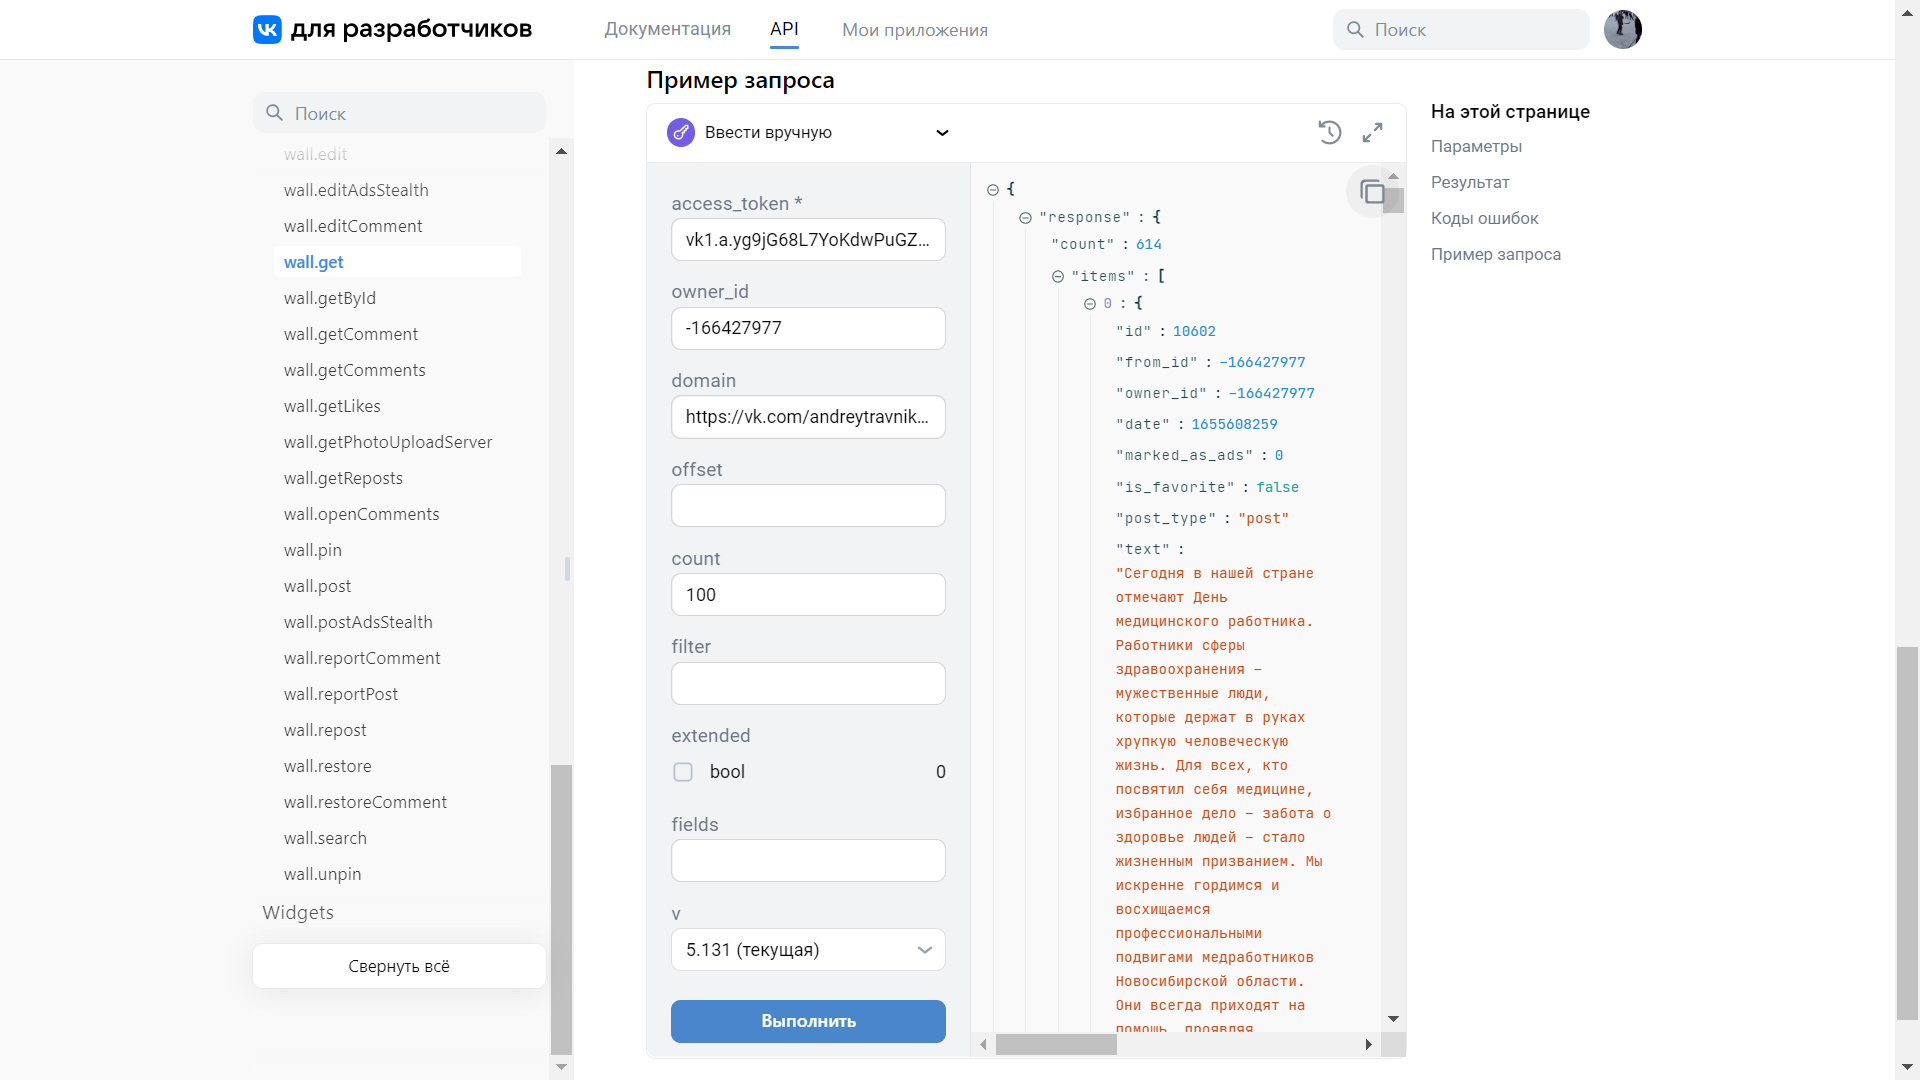

The data is also in the form of a dictionary. The window has a copy button. For example, you can copy and paste this into Notepad and save it as a txt file. 

**!** *There is one problem, it is that you will not be able to automate requests, that is, in order to get Travnikov's wall, you will have to make 7 requests and copy the output each time.*